In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1=pd.read_csv('D:\dataset\index.csv')

In [4]:
df=df1.copy()
df.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3071 non-null   object 
 1   datetime     3071 non-null   object 
 2   cash_type    3071 non-null   object 
 3   card         2982 non-null   object 
 4   money        3071 non-null   float64
 5   coffee_name  3071 non-null   object 
dtypes: float64(1), object(5)
memory usage: 144.1+ KB


In [6]:
df.shape

(3071, 6)

In [7]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [8]:
df['card'].fillna('No Card',inplace=True)

In [9]:
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [10]:
df['date']=pd.to_datetime(df['date'])
df['datetime']=pd.to_datetime(df['datetime'])

<AxesSubplot:ylabel='cash_type'>

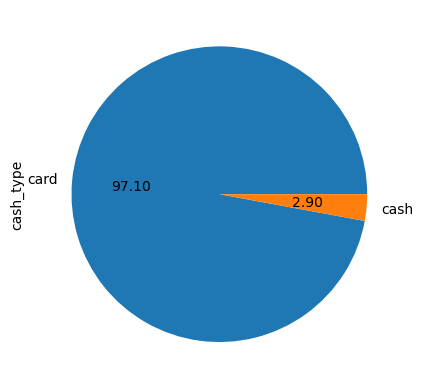

In [11]:
df['cash_type'].value_counts().plot(kind='pie',autopct='%.2f')

## Pie chart showing how much payments made by Cash or card

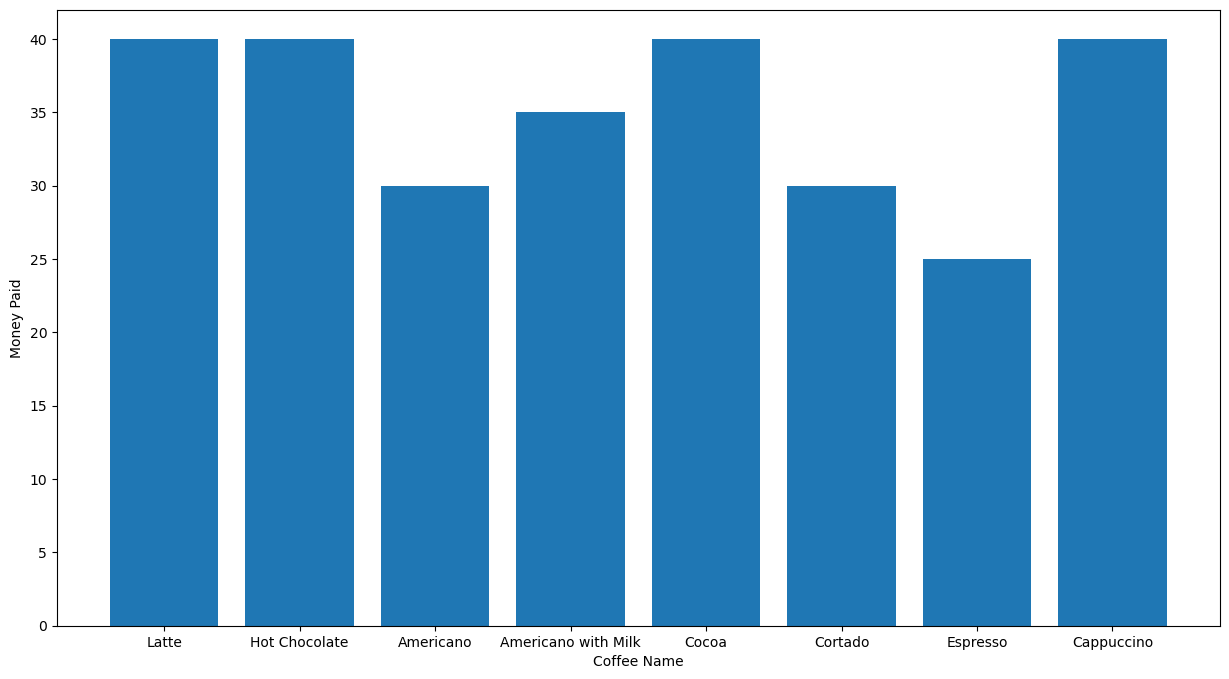

In [12]:
plt.figure(figsize=(15,8))
plt.bar(df['coffee_name'],df['money'])
plt.xlabel("Coffee Name")
plt.ylabel("Money Paid")
plt.show()

## Latte, Hot Chocolate, Cocoa and Cappuccino are most costly beverages

In [13]:
hourwise_sales = df['datetime'].dt.hour.value_counts()
hourwise_sales = pd.DataFrame(hourwise_sales).reset_index()
hourwise_sales.columns=['Hours','Count']
hourwise_sales

,Hours,Count
0,10,291
1,11,250
2,16,225
3,12,216
4,19,206
5,8,202
6,9,201
7,13,199
8,21,192
9,14,186


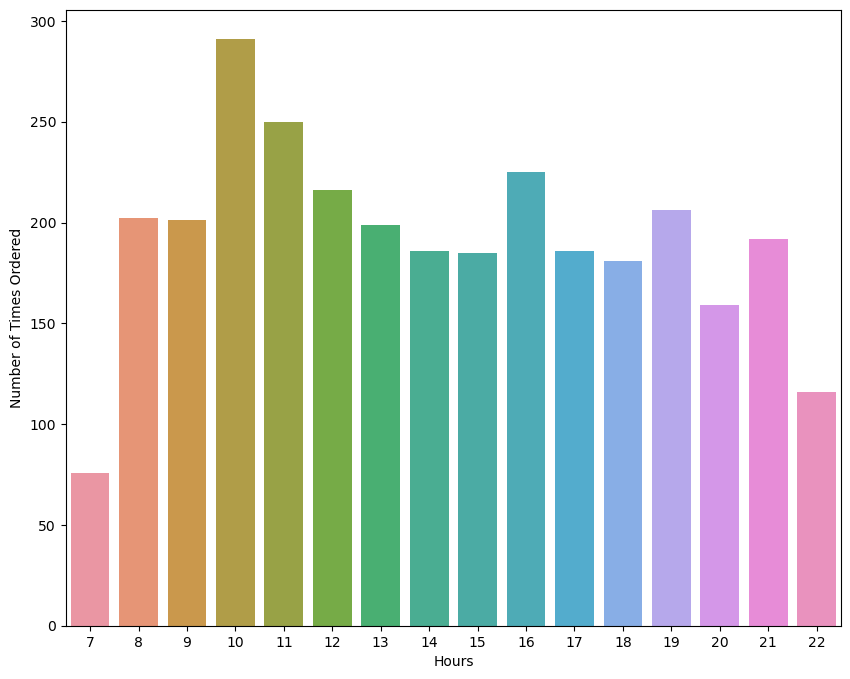

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x=hourwise_sales['Hours'],y=hourwise_sales['Count'])
plt.xlabel('Hours')
plt.ylabel('Number of Times Ordered')
plt.show()

## Maximum number of sales occurs between 9AM to 12PM. 7AM has least sales and so has 10 PM

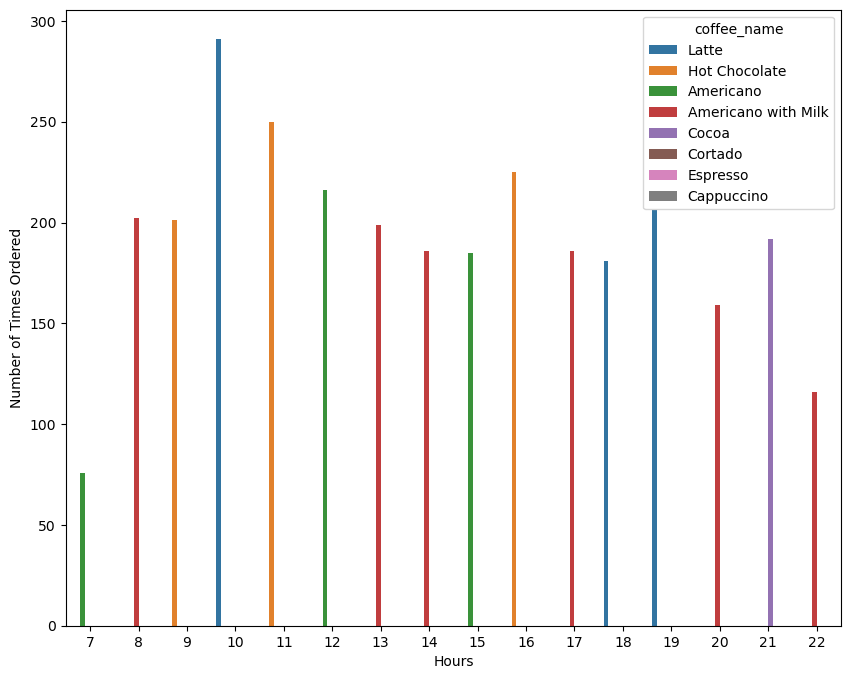

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x=hourwise_sales['Hours'],y=hourwise_sales['Count'],hue=df['coffee_name'])
plt.xlabel('Hours')
plt.ylabel('Number of Times Ordered')
plt.show()

## Customers consume Latte at 10AM and it has highest sales at the 10AM. From 11AM to 1PM Hot chocolate is preffered. Espresso is only consumed at 4PM and not on other times.

In [ ]:
monthwise_sales = df['date'].dt.month.value_counts()
monthwise_sales = pd.DataFrame(monthwise_sales).reset_index()
monthwise_sales.columns=['Month','Count']
monthwise_sales

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=monthwise_sales['Month'],y=monthwise_sales['Count'])
plt.xlabel('Month')
plt.ylabel('Number of Times Ordered')
plt.show()

## April month and November month has least sales. October month nad September month has highest sales.

In [ ]:
df.groupby('coffee_name')['money'].sum().plot(kind='bar',xlabel="Coffee Name",ylabel="Revenue")

## The highest sales were made by Latte followed by Americano with Milk. Latte is a costly beverage and also high in demand. Espresso is least in demand because it generated least revenue

In [ ]:
df['card'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar',color="green",xlabel="Card Number", ylabel="Frequency of Use")

## Top 5 Card holders with frequent purchases

In [ ]:
top_cust=df['card'].value_counts().sort_values(ascending=False).head(5)
top_cust=pd.DataFrame(top_cust).reset_index()
top_cust.columns=['card','count']
top_cust

In [ ]:
cust_fav=df[df['card'].isin(top_cust['card'])]
plt.figure(figsize=(10,8))
custfav=cust_fav.groupby('card')['coffee_name'].value_counts().plot(kind='bar')
plt.xlabel('Card Number')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Top 5 Customers with their favourite drinks

In [ ]:
cust_fav=df[df['card'].isin(top_cust['card'])]
plt.figure(figsize=(20,8))
custfav=cust_fav.groupby('card')['coffee_name'].value_counts().reset_index(name="count")
sns.barplot(x=custfav['card'],y=custfav['count'],hue=custfav['coffee_name'])
plt.xlabel('Card Name')
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Top 5 Customers with their favourite beverages